In [183]:
import csv
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [184]:
dataset = pd.read_csv('/home/nuria/Documents/Occupancy/Occupancy.csv', header= 0)
headers = list(dataset.columns.values)

In [185]:
x= dataset.drop(['Occupancy', 'date'], axis= 1).values#quitar occupancy y date
y= dataset['Occupancy'].values#la salida

In [186]:
#-- 70% train 30% test y estratificado--
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 11067, 1: 3325})
Counter({0: 4743, 1: 1425})


In [187]:
%%time
l_regr= LogisticRegression()
# Entrenamiento
l_regr.fit(x_train, y_train)
# Prediccion
occup_pred = l_regr.predict(x_test)

CPU times: user 832 ms, sys: 4.74 ms, total: 837 ms
Wall time: 276 ms


In [188]:
accuracy = metrics.accuracy_score(y_test, occup_pred)*100
print("Accuracy: ","{:.1f}".format(accuracy),"%")
precision = metrics.precision_score(y_test, occup_pred)*100
print("Precision: ","{:.1f}".format(precision),"%")
recall = metrics.recall_score(y_test, occup_pred)*100
print("Recall: ","{:.1f}".format(recall),"%")

Accuracy:  98.9 %
Precision:  95.9 %
Recall:  99.6 %


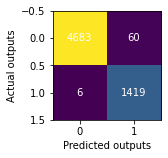

In [189]:
cm= confusion_matrix(y_test, occup_pred)

fig, ax= plt.subplots(figsize=(2,2))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs')
ax.set_ylabel('Actual outputs')
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center', va='center',color='white')
plt.show()